# Example 11.4: Modified Refrigeration

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
R134a is used in a modified refrigeration cycle as shown to cool at two temperatures using a single compressor.  The low $T$ evaporator operates at $-18^\circ\mathrm{C}$ and has a capacity of $3\ \mathrm{tons}$.  The higher $T$ evaporator operates at $3.2\ \mathrm{bar}$ and has a capacity of $2\ \mathrm{tons}$.  The condenser operates at $10\ \mathrm{bar}$. Determine the:
* (a) Mass flow rate through the system
* (b) Compressor power input
* (c) Heat rejection from the consdenser

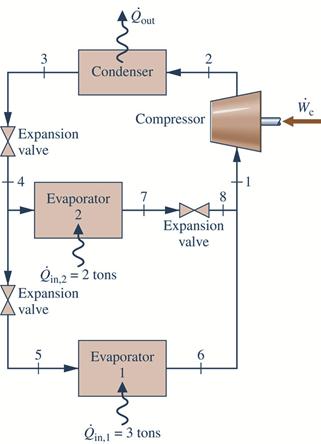

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=2005379&node=7667540&a=39710957&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.default import *
r134a = realfluid.Properties('R134a')

### Given Parameters
We now define variables to hold our known values.

In [2]:
T[5] = T[6] = Quantity(-18,'degC')   # Low T evaprator temperature
p[4] = p[7] = Quantity(3.2, 'bar')   # High T evaporator pressure
p[2] = p[3] = Quantity(10,'bar')     # Condenser pressure
Qdot_in_1 = Quantity(3,'refrigeration_ton').to('kW') # Heat input to low T evaporator
Qdot_in_2 = Quantity(2,'refrigeration_ton').to('kW') # Heat input to high T evaporator

Summary();

<IPython.core.display.Latex object>

,T,p
unit,K,kPa
2,-,1000.0
3,-,1000.0
4,-,320.0
5,255.15,-
6,255.15,-
7,-,320.0


### Assumptions
- Ideal work devices
- Saturated liquid at condenser exit
- Saturated liquid at Evaporator exit
- Isobaric heat exchangers
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [3]:
x[7] = x[6] = 1
x[3] = 0
p[6] = r134a.p(T[6],x[6])
p[5] = p[8] = p[1] = p[6]

Summary();

<IPython.core.display.Latex object>

,T,p,x
unit,K,kPa,
1,-,144.600367,-
2,-,1000.000000,-
3,-,1000.000000,0.0
4,-,320.000000,-
5,255.15,144.600367,-
6,255.15,144.600367,1.0
7,-,320.000000,1.0
8,-,144.600367,-


### (a) Mass Flow Rates

In [4]:
%%showcalc
#### First Law Analysis
##### Isenthalpic from 3 to 4 to 5
h[3] = r134a.h(p[3],x[3])
h[4] = h[5] = h[3]

##### Saturated vapor at 6 and 7
h[6] = r134a.h(p[6],x[6])
h[7] = r134a.h(p[7],x[7])

##### Mass flow rates from 1st Law
q_in_2 = h[7]-h[4]
mdot[7] = mdot[4] = mdot[8] = Qdot_in_2/q_in_2
q_in_1 = h[6]-h[5]
mdot[6] = mdot[5] = Qdot_in_1/q_in_1
mdot[1] = mdot[2] = mdot[3] = mdot[8]+mdot[6]

### First Law Analysis

#### Isenthalpic from 3 to 4 to 5

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Saturated vapor at 6 and 7

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Mass flow rates from 1st Law

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### (b) Compressor power input

In [5]:
%%showcalc
#### 1st Law to fix state 1
h[8] = h[7]
h[1] = (mdot[8]*h[8] + mdot[6]*h[6])/mdot[1]
s[1] = r134a.s(p[1],h=h[1])

#### 1-2) Ideal Compression
s[2] = s[1]
h[2] = r134a.h(p[2],s[2])
w_in = h[2]-h[1]
Wdot_in = mdot[1]*w_in

### 1st Law to fix state 1

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 1-2) Ideal Compression

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### (c) Heat rejection from the condenser

In [6]:
%%showcalc
q_out = h[2]-h[3]
Qdot_out = mdot[2]*q_out

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Summary

In [7]:
Summary();

<IPython.core.display.Latex object>

,T,p,h,s,x,mdot
unit,K,kPa,kJ/kg,kJ/K/kg,,kg/s
1,-,144.600367,392.431395,1.757571,-,0.128413
2,-,1000.000000,433.938256,1.757571,-,0.128413
3,-,1000.000000,255.495856,-,0.0,0.128413
4,-,320.000000,255.495856,-,-,0.048661
5,255.15,144.600367,255.495856,-,-,0.079752
6,255.15,144.600367,387.787860,-,1.0,0.079752
7,-,320.000000,400.041884,-,1.0,0.048661
8,-,144.600367,400.041884,-,-,0.048661


### Diagrams

In [8]:
# Remaining properties
for i in range(1,9):
    states.fix(i, r134a)

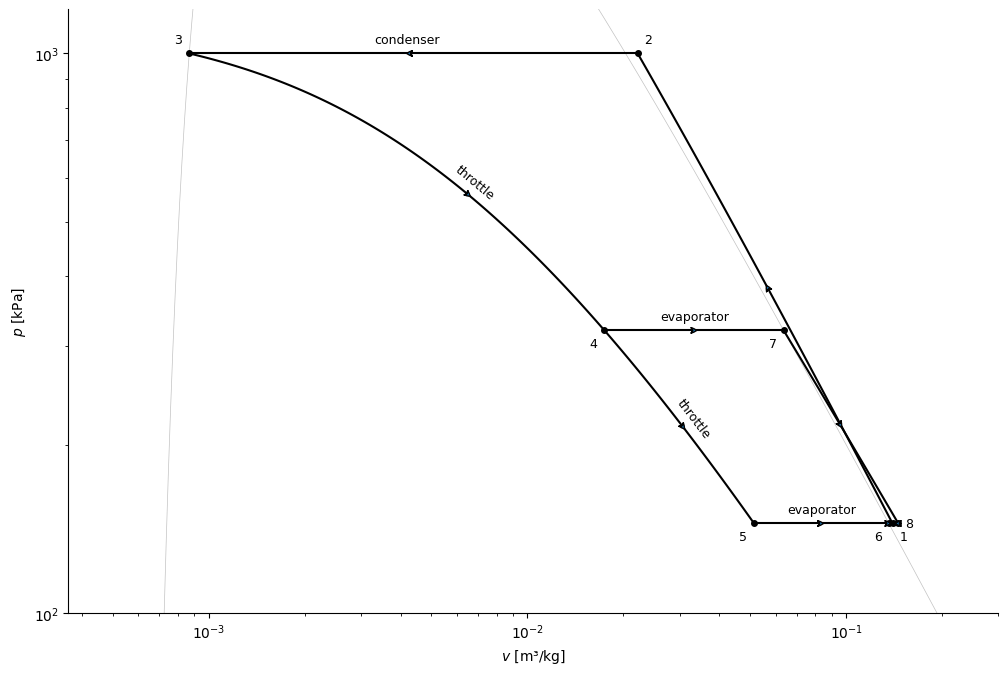

In [9]:
pv = r134a.pv_diagram()
pv.ax.set_ylim(bottom=100, top=1200)
pv.ax.set_xlim(right=.3)

pv.plot_state(states[1],label_loc='south east')
pv.plot_state(states[2],label_loc='north east')
pv.plot_state(states[3],label_loc='north west')
pv.plot_state(states[4],label_loc='south west')
pv.plot_state(states[5],label_loc='south west')
pv.plot_state(states[6],label_loc='south west')
pv.plot_state(states[7],label_loc='south west')
pv.plot_state(states[8],label_loc='east')

pv.plot_process(states[1],states[2],path='isentropic')
pv.plot_process(states[2],states[3],path='isobaric',label='condenser')
pv.plot_process(states[3],states[4],path='isenthalpic',label='throttle')
pv.plot_process(states[4],states[7],path='isobaric',label='evaporator')
pv.plot_process(states[4],states[5],path='isenthalpic',label='throttle')
pv.plot_process(states[5],states[6],path='isobaric',label='evaporator')
pv.plot_process(states[6],states[1],path='isobaric')
pv.plot_process(states[7],states[8],path='isenthalpic')
pv.plot_process(states[8],states[1],path='isobaric');

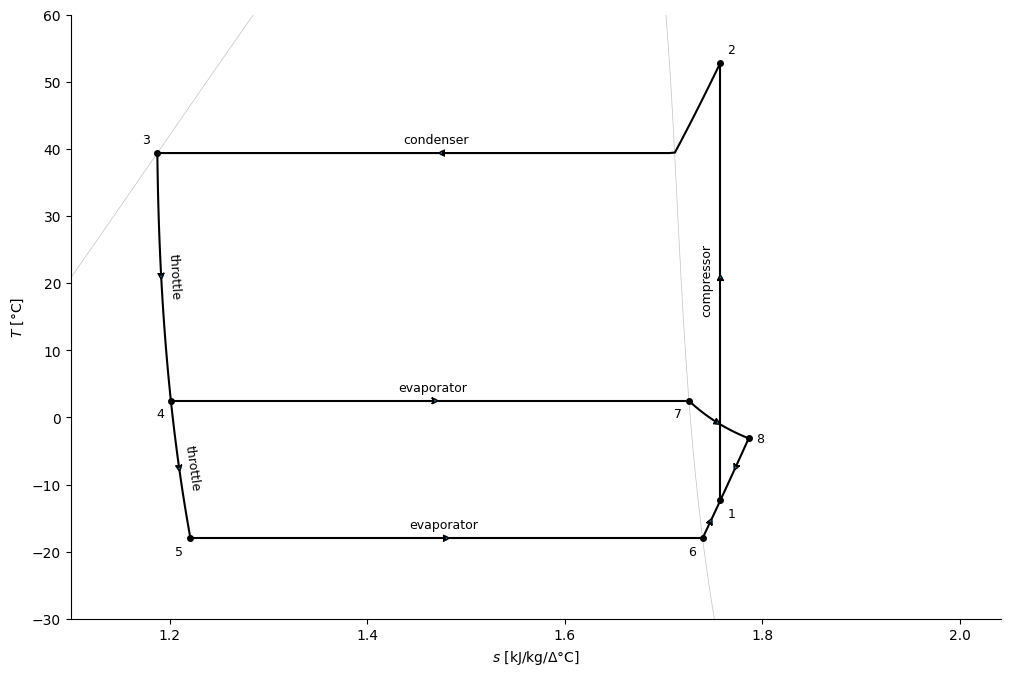

In [10]:
Ts = r134a.Ts_diagram()
Ts.ax.set_ylim(bottom=-30,top=60)
Ts.ax.set_xlim(left=1.1)

Ts.plot_state(states[1],label_loc='south east')
Ts.plot_state(states[2],label_loc='north east')
Ts.plot_state(states[3],label_loc='north west')
Ts.plot_state(states[4],label_loc='south west')
Ts.plot_state(states[5],label_loc='south west')
Ts.plot_state(states[6],label_loc='south west')
Ts.plot_state(states[7],label_loc='south west')
Ts.plot_state(states[8],label_loc='east')

Ts.plot_process(states[1],states[2],path='isentropic',label='compressor')
Ts.plot_process(states[2],states[3],path='isobaric',label='condenser')
Ts.plot_process(states[3],states[4],path='isenthalpic',label='throttle')
Ts.plot_process(states[4],states[7],path='isobaric',label='evaporator')
Ts.plot_process(states[4],states[5],path='isenthalpic',label='throttle')
Ts.plot_process(states[5],states[6],path='isobaric',label='evaporator')
Ts.plot_process(states[6],states[1],path='isobaric')
Ts.plot_process(states[7],states[8],path='isenthalpic')
Ts.plot_process(states[8],states[1],path='isobaric');